This is based on http://eriqande.github.io/sisg_mcmc_course/s03-01-intro-mcmc-in-R.nb.html

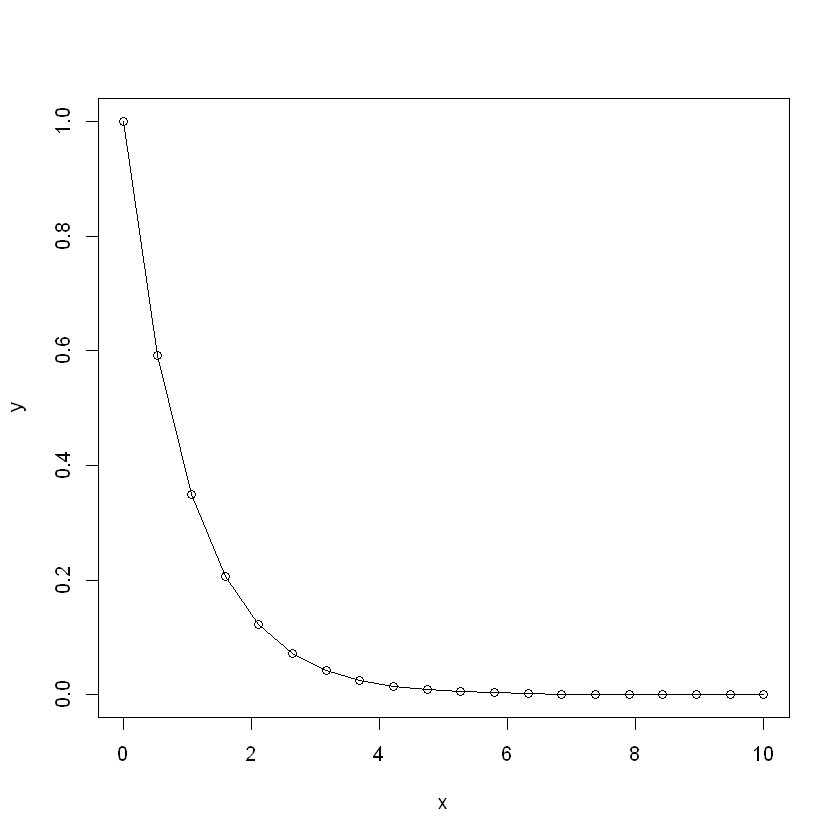

In [1]:
# We generate an exponential distribution
x <- seq(from = 0, to = 10, length=20)
y <- exp(-x)
plot(x,y)
lines(x,y) #lines adds lines to an existing plot

In [2]:
# We specify the target function that we want to sample from
target <- function(x){
  if (x < 0) {
    return(0)
  } else {
    return(exp(-x))
  }
}

In [3]:
# We apply a Metropolis-Hastings Algorithm to sample from a distribution serially correlated to the target
x <- rep(0, 1000)
x[1] <- 3     # this is just a starting value, which I’ve set arbitrarily to 3

for (i in 2:1000) {
  currentx <- x[i - 1]
  proposedx <- currentx + rnorm(1, mean = 0, sd = 1)

  A <- target(proposedx) / target(currentx)
  
  # Generates a random variable that is uniformly distributed and compares that to A
  if (runif(1) < A) {
    x[i] <- proposedx
  } else {
    x[i] <- currentx
  }
}

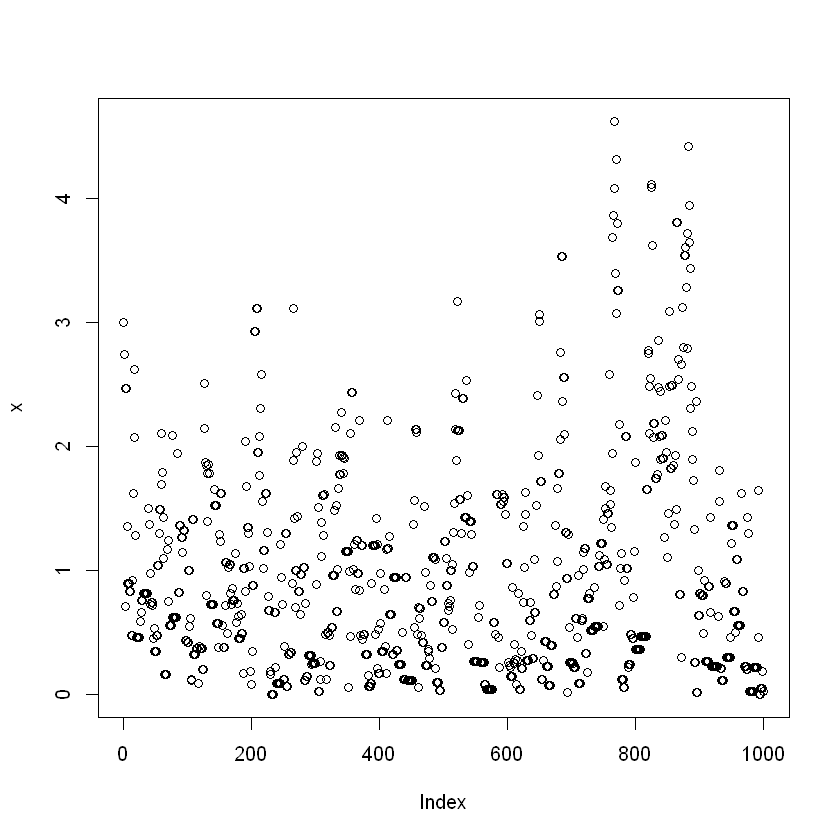

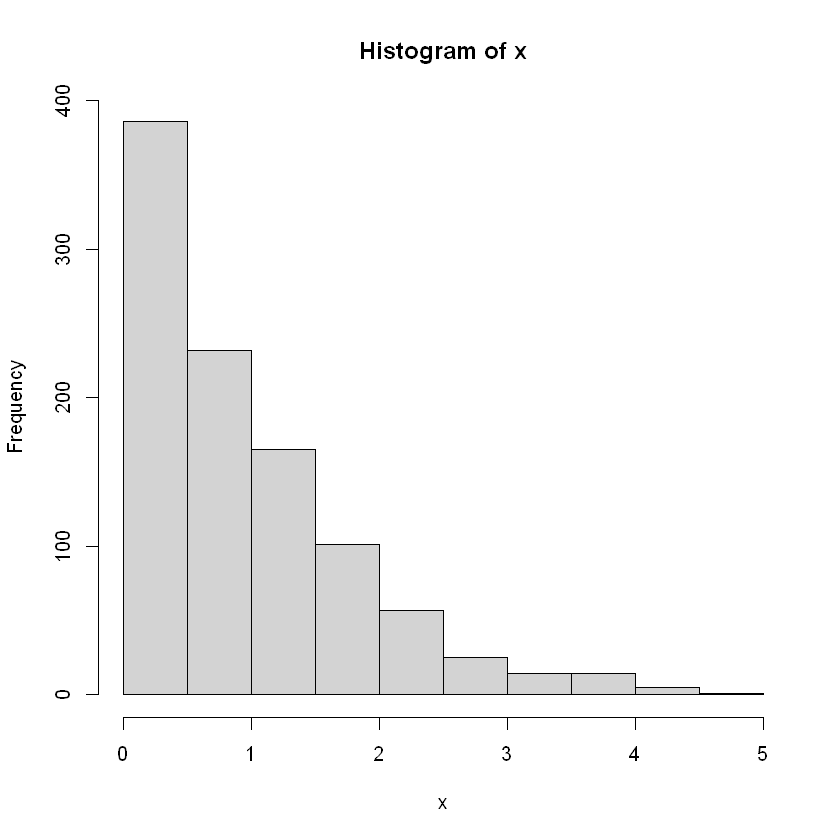

In [4]:
plot(x)
hist(x)